In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('train_agriculture.xlsx')
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
df=pd.DataFrame(data)

In [4]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Id is object type, Number_Weeks_Used is float type and rest are int type.

In [5]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Number_doses_week have null values, which have to be treated

In [6]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

ID
F00001039    1
F00005457    1
F00001678    1
F00002554    1
F00007066    1
            ..
F00001128    1
F00000547    1
F00002453    1
F00004969    1
F00000514    1
Name: ID, Length: 4599, dtype: int64
Estimated_Insects_Count
1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64
Crop_Type
0    3565
1    1034
Name: Crop_Type, dtype: int64
Soil_Type
0    2407
1    2192
Name: Soil_Type, dtype: int64
Pesticide_Use_Category
2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64
Number_Doses_Week
20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64
Number_Weeks_Used
20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
6

Column ID have all unique values, Thus we can drop this column.

In [7]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [8]:
df.dropna(0,inplace=True)
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4593,2138,0,1,2,60,47.0,6,3,0
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


We drops row having nan values from 'Number_Weeks_Quit' column.

In [9]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


There are outliner in columns-Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit.


In [10]:
df.skew()

Estimated_Insects_Count    0.915308
Crop_Type                  1.314816
Soil_Type                  0.098785
Pesticide_Use_Category     0.689065
Number_Doses_Week          0.963165
Number_Weeks_Used          0.264944
Number_Weeks_Quit          0.916936
Season                     0.149567
Crop_Damage                2.340099
dtype: float64

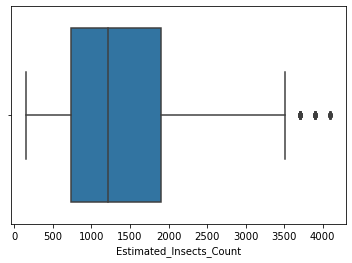

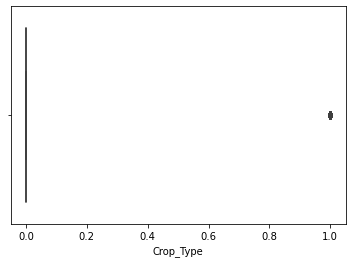

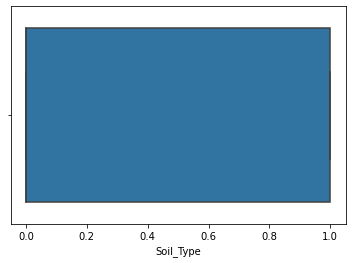

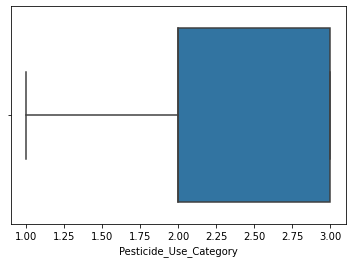

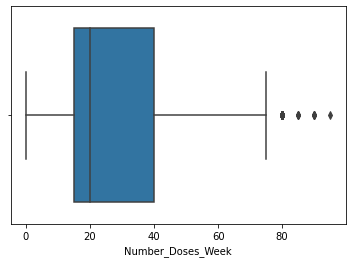

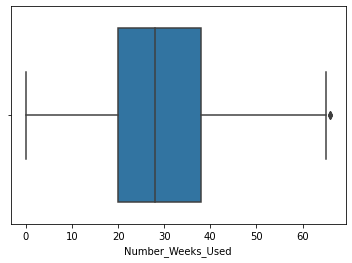

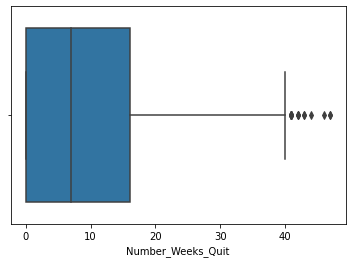

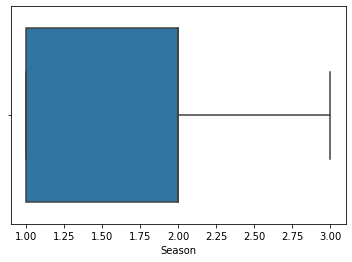

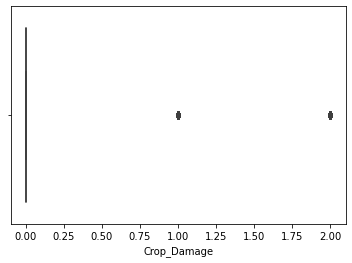

In [11]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [12]:
from scipy.stats import zscore
z=np.abs(zscore(df[{'Estimated_Insects_Count','Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit'}]))
df_new=df[(z<3).all(axis=1)]

In [13]:
df_new.shape

(4052, 9)

In [14]:
df=df_new

In [15]:
df.skew()

Estimated_Insects_Count    0.792445
Crop_Type                  1.303590
Soil_Type                  0.090947
Pesticide_Use_Category     0.699880
Number_Doses_Week          0.716707
Number_Weeks_Used          0.271542
Number_Weeks_Quit          0.831867
Season                     0.149195
Crop_Damage                2.355510
dtype: float64

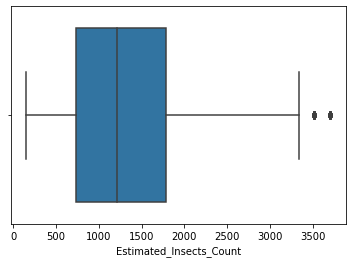

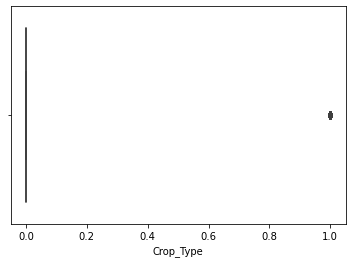

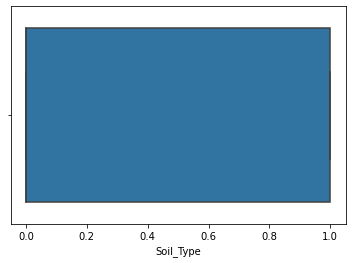

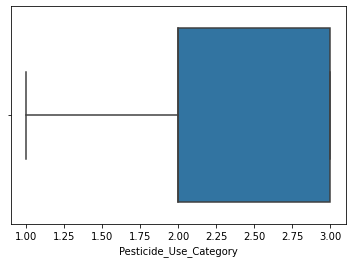

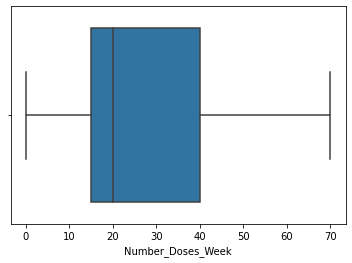

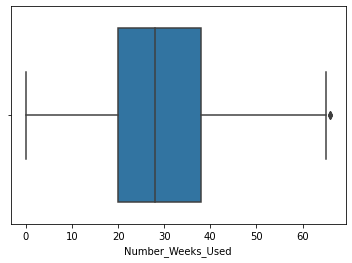

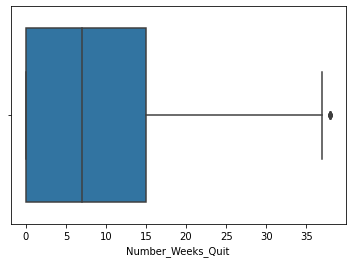

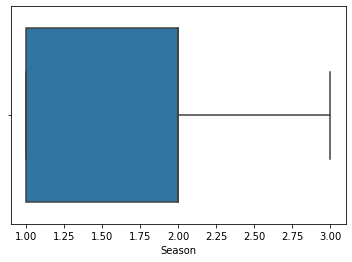

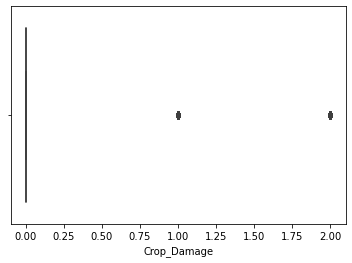

In [16]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

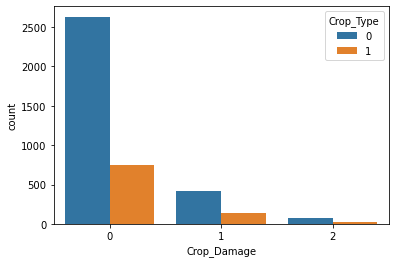

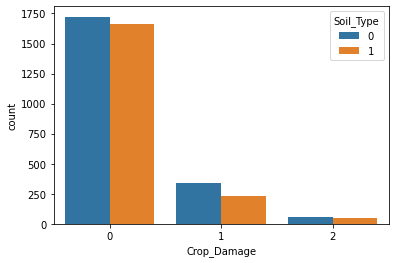

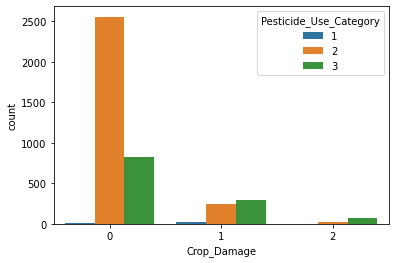

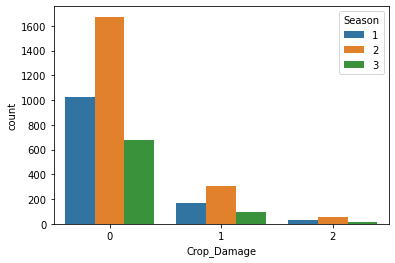

In [17]:
col2=[ 'Crop_Type', 'Soil_Type','Pesticide_Use_Category', 'Season',]
for i in col2:
    sns.countplot(x='Crop_Damage', hue=i, data=df)
    plt.show()

Crop_type, Soil_type , seasons shows the same tread with Crop_Damage types
Only variation is discovered in Pesticides_Used_categories with three Crop_Damage categories.

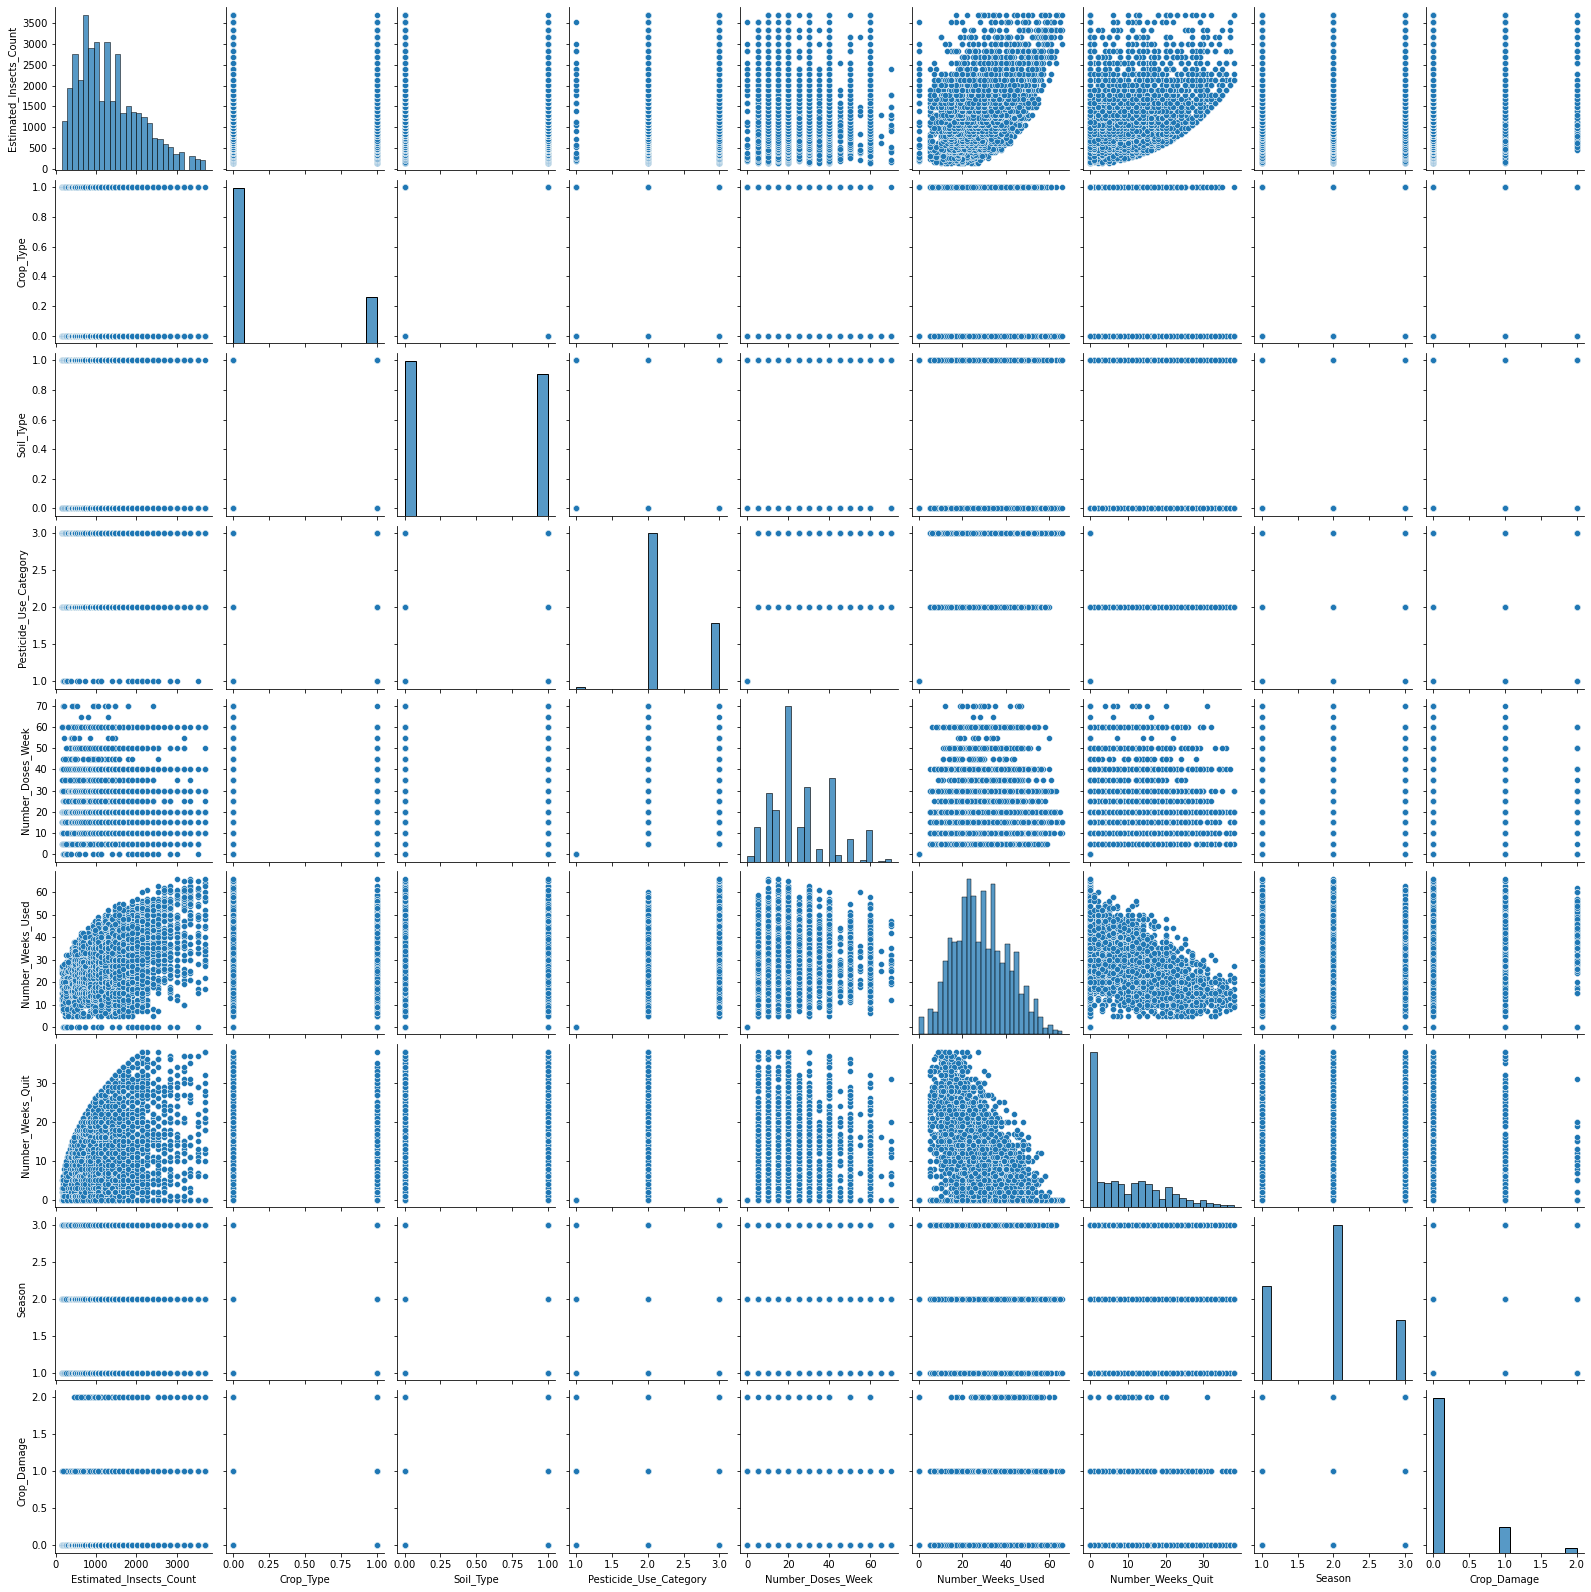

In [18]:
sns.pairplot(df_new)

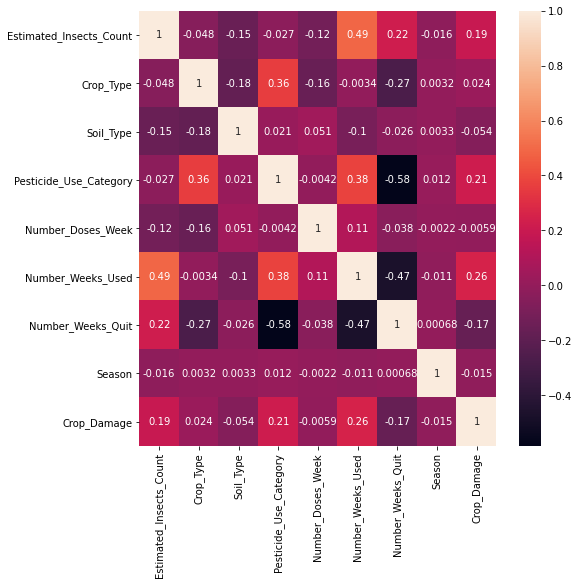

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

season column have very low correlation with target and other columns, Thus we can drop it

In [20]:
df.drop('Number_Doses_Week',axis=1,inplace=True)
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0.0,0,1,0
1,209,1,0,1,0.0,0,2,1
2,257,1,0,1,0.0,0,2,1
3,257,1,1,1,0.0,0,2,1
4,342,1,0,1,0.0,0,2,1


In [21]:
x=df.drop('Crop_Damage', axis=1)
x.shape

(4052, 7)

In [22]:
y= df['Crop_Damage']
y.shape

(4052,)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.48921386,  1.84508748, -0.95557605, ..., -2.3070168 ,
        -0.96306807, -1.27946147],
       [-1.46197659,  1.84508748, -0.95557605, ..., -2.3070168 ,
        -0.96306807,  0.15387496],
       [-1.39971998,  1.84508748, -0.95557605, ..., -2.3070168 ,
        -0.96306807,  0.15387496],
       ...,
       [ 1.20727556, -0.54197972,  1.04648918, ..., -1.74850138,
         1.89975932,  0.15387496],
       [ 1.20727556, -0.54197972,  1.04648918, ..., -0.71125847,
         1.58166738,  0.15387496],
       [ 1.20727556, -0.54197972,  1.04648918, ...,  0.32598444,
         0.83945288,  0.15387496]])

# MODEL SELECTION

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [26]:
model=[DecisionTreeClassifier(), KNeighborsClassifier(), SVC()]
for i in model:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    print('*************************************************')
    print('\n')

DecisionTreeClassifier()
Accuracy score : 0.7472256473489519
Confusion matrix :
 [[575  88  14]
 [ 78  29   6]
 [ 13   6   2]]
Classification report: 
                precision    recall  f1-score   support

           0       0.86      0.85      0.86       677
           1       0.24      0.26      0.25       113
           2       0.09      0.10      0.09        21

    accuracy                           0.75       811
   macro avg       0.40      0.40      0.40       811
weighted avg       0.76      0.75      0.75       811

*************************************************


KNeighborsClassifier()
Accuracy score : 0.812577065351418
Confusion matrix :
 [[640  36   1]
 [ 93  19   1]
 [ 14   7   0]]
Classification report: 
                precision    recall  f1-score   support

           0       0.86      0.95      0.90       677
           1       0.31      0.17      0.22       113
           2       0.00      0.00      0.00        21

    accuracy                           0.81   

# CROSS VALIDATION

In [27]:
for i in model:
    cross=cross_val_score(i,x,y,cv=5)
    print(i)
    print('Score:',cross)
    print('Mean_score:',cross.mean())
    print('STD_score:',cross.std())
    print('****************************/n')

DecisionTreeClassifier()
Score: [0.66091245 0.73119605 0.71358025 0.70123457 0.75802469]
Mean_score: 0.7129896028375272
STD_score: 0.03228062339536995
****************************/n
KNeighborsClassifier()
Score: [0.75709001 0.82367448 0.79135802 0.79135802 0.83209877]
Mean_score: 0.7991158606201763
STD_score: 0.026748972160042527
****************************/n
SVC()
Score: [0.8298397  0.83477189 0.8345679  0.83333333 0.8345679 ]
Mean_score: 0.8334161452862645
STD_score: 0.0018595110932400653
****************************/n


# ENSEMBLE TECHNIQUE

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred))
print('Confusion matrix :\n', confusion_matrix(y_test,pred))
print('Classification report: \n ', classification_report(y_test,pred))

Accuracy score : 0.8360049321824907
Confusion matrix :
 [[676   1   0]
 [111   2   0]
 [ 20   1   0]]
Classification report: 
                precision    recall  f1-score   support

           0       0.84      1.00      0.91       677
           1       0.50      0.02      0.03       113
           2       0.00      0.00      0.00        21

    accuracy                           0.84       811
   macro avg       0.45      0.34      0.32       811
weighted avg       0.77      0.84      0.77       811



In [29]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
print(accuracy_score(y_test,adpred))
print(confusion_matrix(y_test,adpred))
print(classification_report(y_test,adpred))

0.8261405672009864
[[666  11   0]
 [109   4   0]
 [ 19   2   0]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       677
           1       0.24      0.04      0.06       113
           2       0.00      0.00      0.00        21

    accuracy                           0.83       811
   macro avg       0.36      0.34      0.32       811
weighted avg       0.73      0.83      0.76       811



Since only DecisionTreeClassifier() is giving f1 score for Label value(2). Thus we choose it.

# HYPERPARAMETER TUNING

In [30]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini','entropy')}
dtc=DecisionTreeClassifier()
Grid=GridSearchCV(dtc,parameters)
Grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy')})

In [31]:
Grid.best_params_

{'criterion': 'gini'}

Since gini is the default in DecisionTreeClassifier, we use it

In [32]:
dtc2=DecisionTreeClassifier()
dtc2.fit(x_train,y_train)
pred2=dtc2.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred2))
print('Confusion matrix :\n', confusion_matrix(y_test,pred2))
print('Classification report: \n ', classification_report(y_test,pred2))

Accuracy score : 0.7311960542540074
Confusion matrix :
 [[562 102  13]
 [ 80  29   4]
 [ 13   6   2]]
Classification report: 
                precision    recall  f1-score   support

           0       0.86      0.83      0.84       677
           1       0.21      0.26      0.23       113
           2       0.11      0.10      0.10        21

    accuracy                           0.73       811
   macro avg       0.39      0.39      0.39       811
weighted avg       0.75      0.73      0.74       811



# SAVING THE BEST MODEL

In [33]:
import joblib

In [34]:
joblib.dump(dtc2,'agriculture.pkl')

['agriculture.pkl']

In [35]:
data2=pd.read_excel('test_agriculture.xlsx')
data2

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [36]:
df2=pd.DataFrame(data2)

In [37]:
df2.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [38]:
for i in df2.columns:
    print(i)
    print(df2[i].value_counts())

ID
F00001851    1
F00001274    1
F00001961    1
F00001514    1
F00001474    1
            ..
F00001765    1
F00002707    1
F00000412    1
F00000254    1
F00000426    1
Name: ID, Length: 1199, dtype: int64
Estimated_Insects_Count
1132    58
915     49
1056    48
1385    47
851     45
        ..
3896     2
257      2
3515     2
3336     1
4096     1
Name: Estimated_Insects_Count, Length: 70, dtype: int64
Crop_Type
0    966
1    233
Name: Crop_Type, dtype: int64
Soil_Type
0    653
1    546
Name: Soil_Type, dtype: int64
Pesticide_Use_Category
2    695
3    482
1     22
Name: Pesticide_Use_Category, dtype: int64
Number_Doses_Week
20    293
40    166
30    162
10    156
15     99
5      70
60     62
50     50
25     48
35     28
0      22
45     14
80     10
55      7
70      6
65      3
90      2
75      1
Name: Number_Doses_Week, dtype: int64
Number_Weeks_Used
20.0    49
30.0    48
25.0    45
35.0    44
22.0    39
18.0    37
28.0    35
40.0    32
16.0    30
15.0    30
34.0    29
24.0    27

In [39]:
df2.drop('ID', axis=1, inplace=True)
df2.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [40]:
df2.dropna(0,inplace=True)
df2

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
5,851,0,1,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
1192,1132,0,1,2,60,14.0,23,2
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1


In [41]:
df2.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,1274.525926,0.193519,0.465741,2.384259,26.402778,29.033333,7.097222,1.877778
std,840.230560,0.395239,0.499056,0.519796,16.111860,12.782083,8.894646,0.683356
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,626.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1678.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


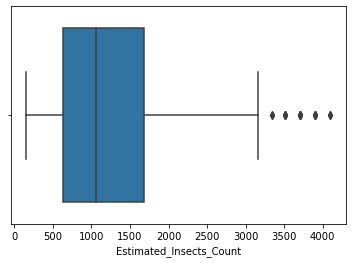

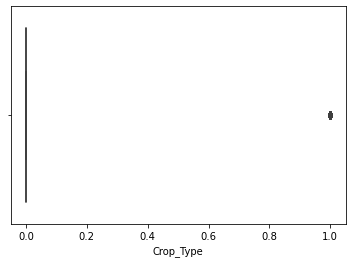

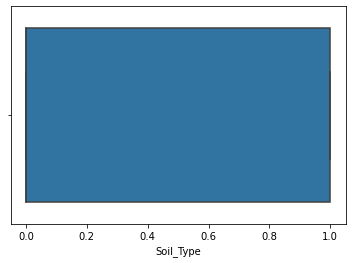

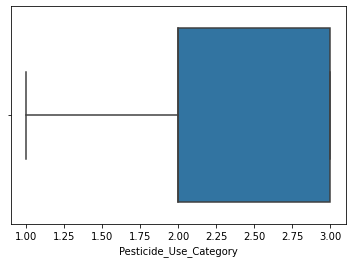

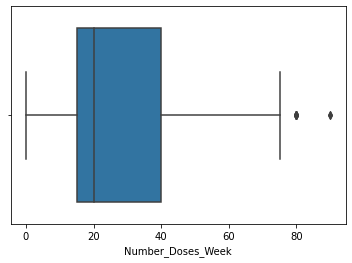

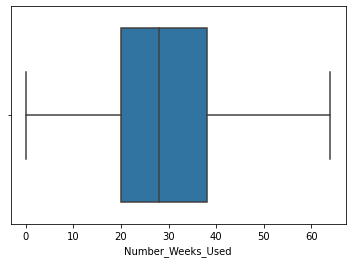

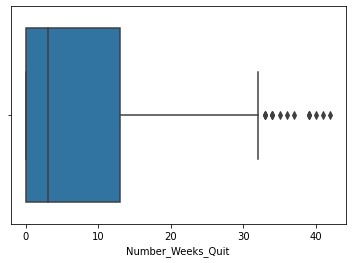

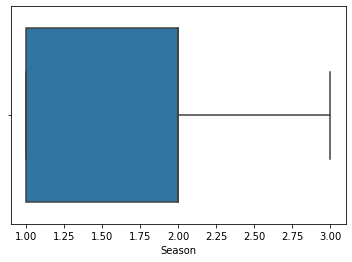

In [42]:
for i in df2.columns:
    sns.boxplot(df2[i])
    plt.show()

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
df_new=df2[(z<3).all(axis=1)]

In [44]:
df_new.shape

(1043, 8)

In [45]:
df2=df_new

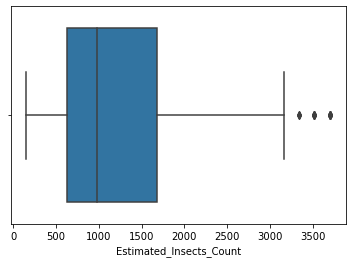

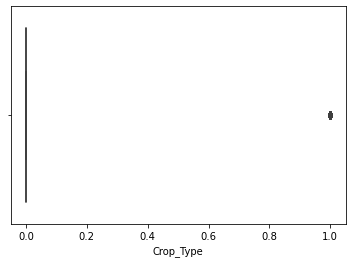

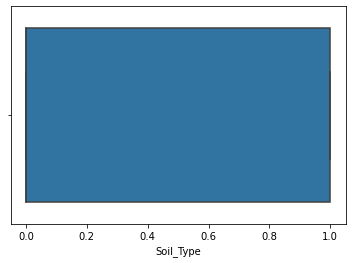

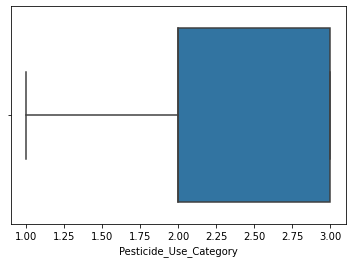

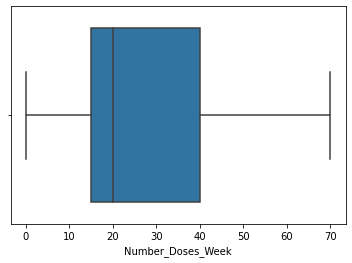

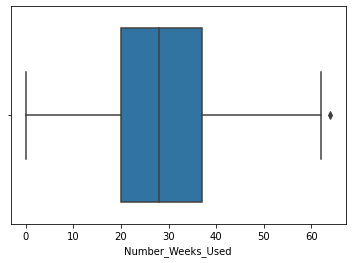

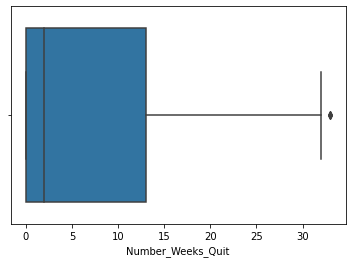

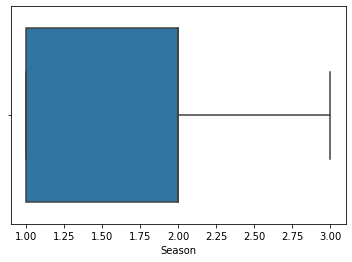

In [46]:
for i in df2.columns:
    sns.boxplot(df2[i])
    plt.show()

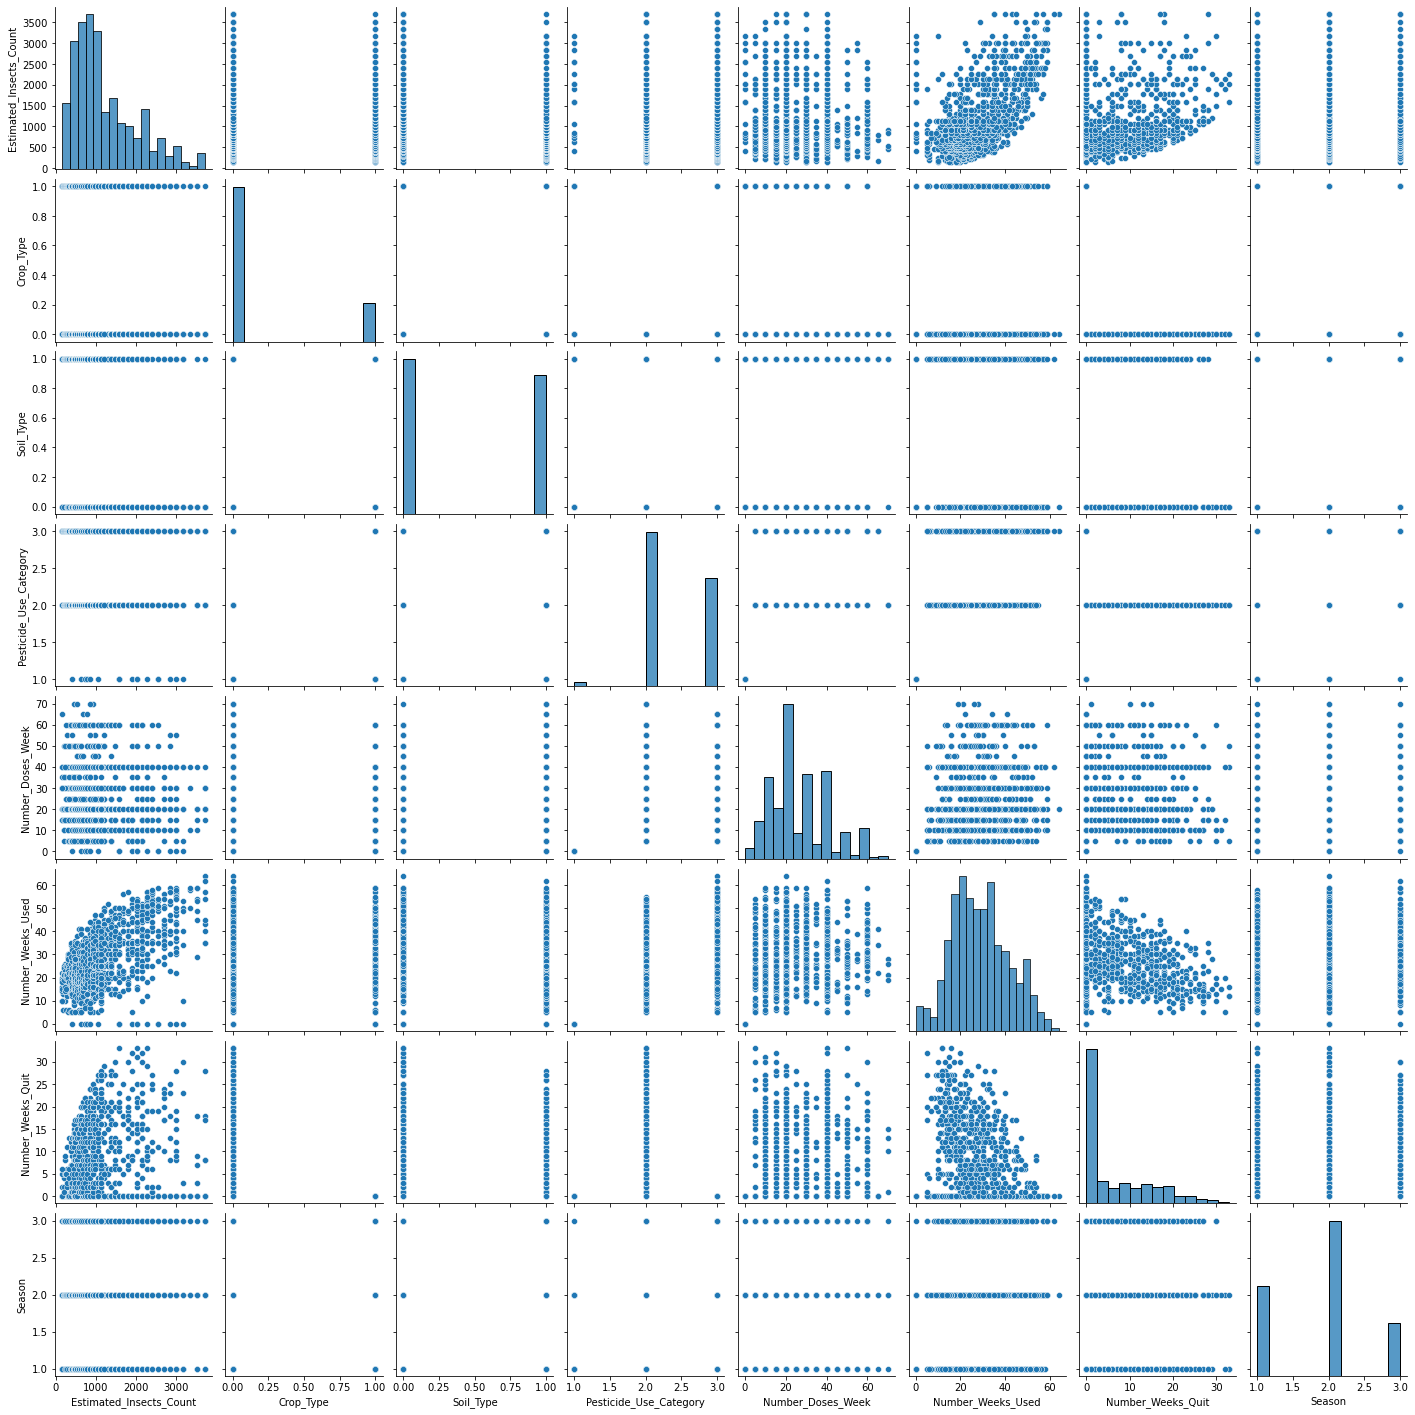

In [47]:
sns.pairplot(df2)

In [48]:
df2

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
5,851,0,1,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
1192,1132,0,1,2,60,14.0,23,2
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1


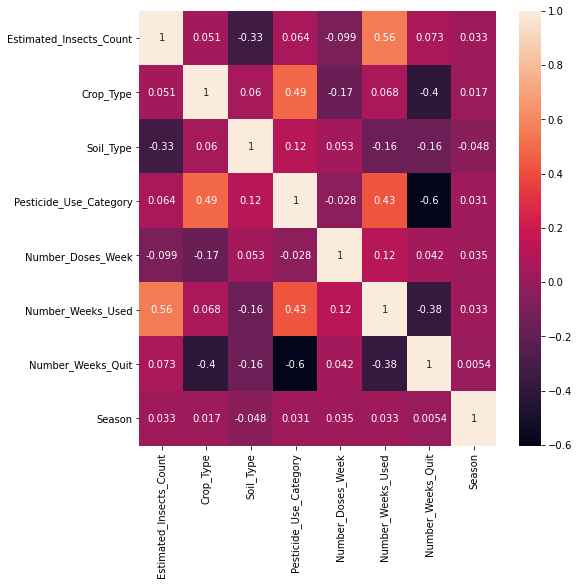

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [50]:
df2.drop('Number_Doses_Week',axis=1,inplace=True)
df2.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Used,Number_Weeks_Quit,Season
1,410,1,1,1,0.0,0,2
2,626,1,0,1,0.0,0,2
3,731,1,0,1,0.0,0,2
4,789,0,0,1,0.0,0,1
5,851,0,1,1,0.0,0,2


In [51]:
sc=StandardScaler()
xx=sc.fit_transform(df2)
xx

array([[-1.04842055,  2.01571496,  1.05419924, ..., -2.26797724,
        -0.81362387,  0.18427287],
       [-0.77186288,  2.01571496, -0.94858729, ..., -2.26797724,
        -0.81362387,  0.18427287],
       [-0.63742512,  2.01571496, -0.94858729, ..., -2.26797724,
        -0.81362387,  0.18427287],
       ...,
       [-0.12400092, -0.49610189,  1.05419924, ..., -0.30874366,
        -0.45266696, -1.28287681],
       [-0.12400092, -0.49610189,  1.05419924, ..., -1.24917578,
         1.95371245, -1.28287681],
       [-0.02157216, -0.49610189,  1.05419924, ...,  0.47494978,
        -0.21202902, -1.28287681]])

In [52]:
mod=joblib.load('agriculture.pkl')

In [53]:
data3=mod.predict(xx)

In [54]:
result=pd.DataFrame(data3)

In [55]:
result.columns=['Crop_Damage']

In [56]:
result

,Crop_Damage
0,1
1,1
2,1
3,1
4,1
...,...
1038,0
1039,0
1040,0
1041,0


In [57]:
result.value_counts()

Crop_Damage
0              823
1              190
2               30
dtype: int64